In [1]:
import numpy as np
from chromauto.ch_parser import CHFile
from chromauto.utils import normalize_baseline

from split_files.isoprene_integration import Isoprene_Integrate

In [2]:
"""
For this example, the blank run was provided as a CSV file instead of the '.ch' file 
"""

bx = []
by = []
with open('./split_files/BLANK_TEMPERATURE_EFFECT.CSV', 'rb') as f:
    b = f.read()
    for idx, i in enumerate(b[2:].split(b'\n')):
        nums = i.replace(b'\x00', b'').split(b'\t')
        try:
            bx.append(float(nums[0].rstrip()))
            by.append(float(nums[1].rstrip()))
        except Exception as e:
            print(e)
            print(nums[0][2:].rstrip())
base_bx = np.array(bx)
base_by = np.array(by)

could not convert string to float: 
b''


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


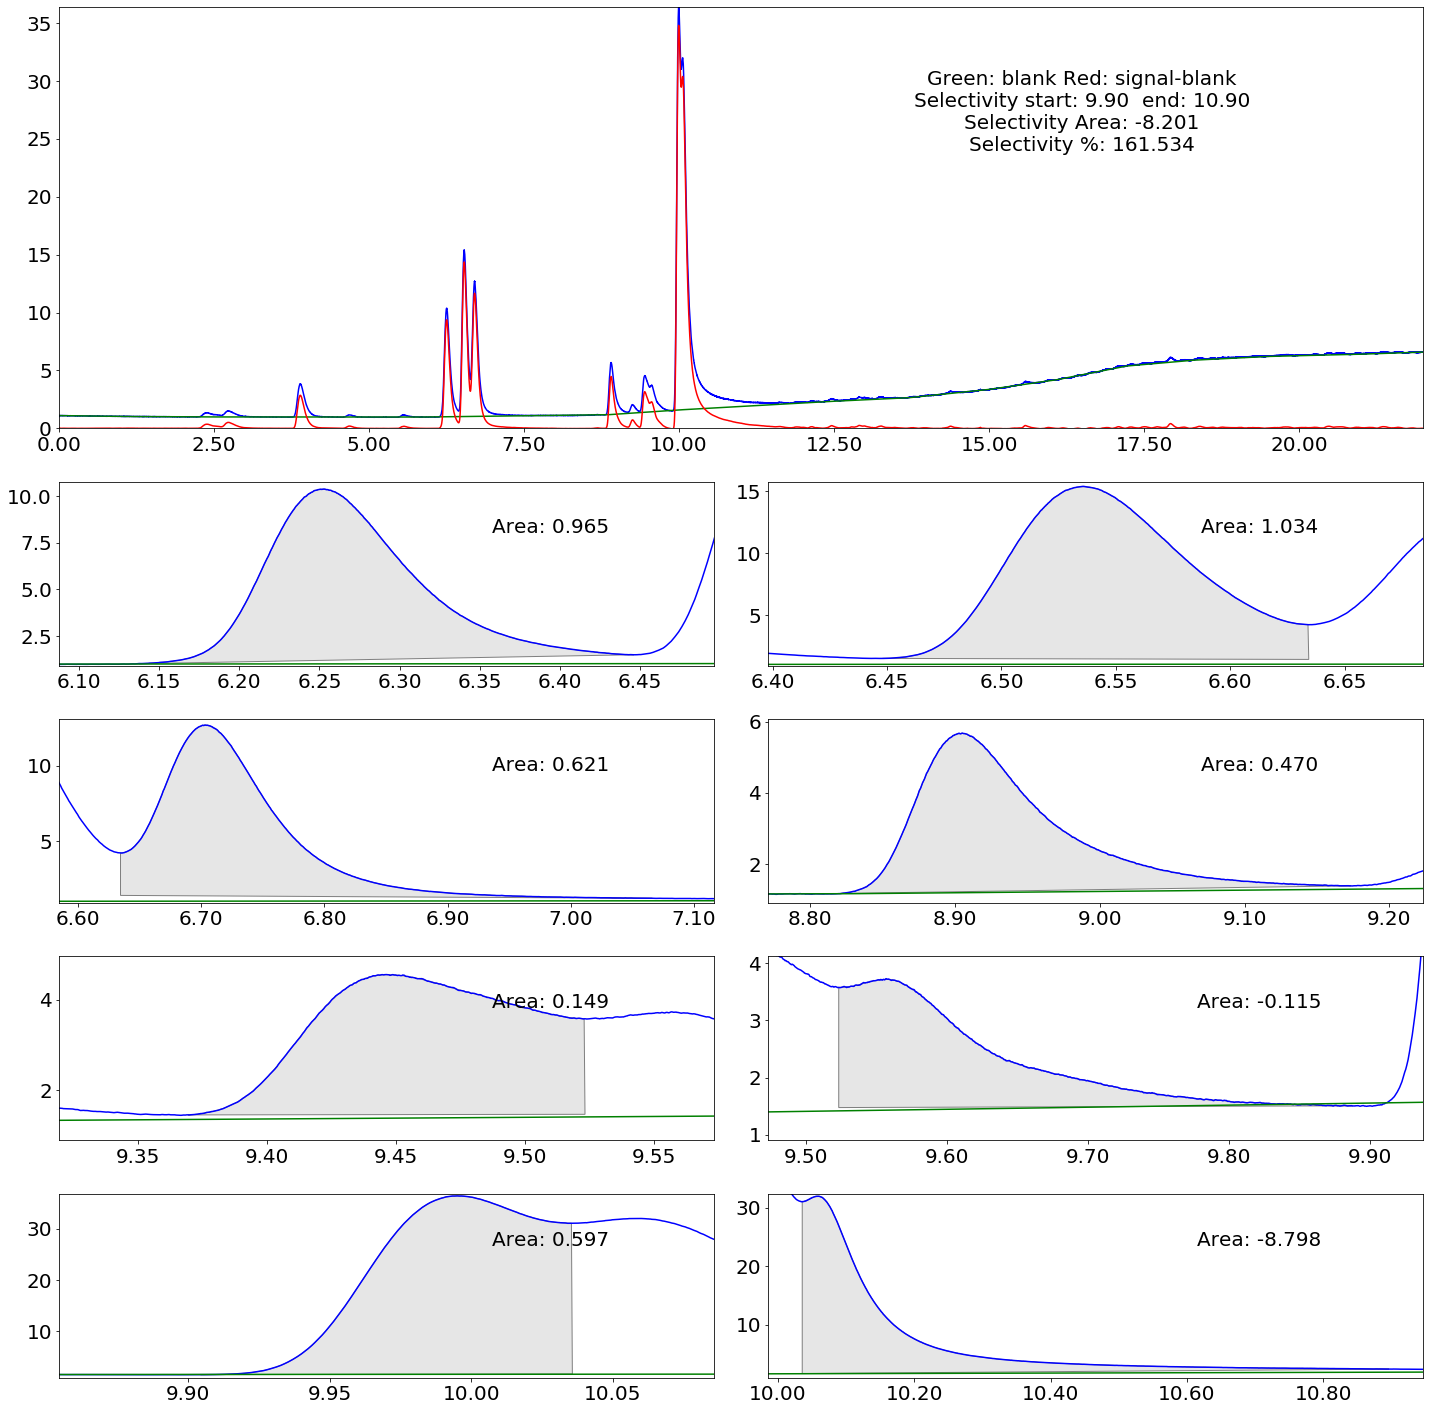

{'Selectivity percentage': 161.534}

<Figure size 432x288 with 0 Axes>

In [3]:
example_data_file = CHFile('./split_files/test_iso_odd.ch')
rx = np.array(example_data_file.times())
ry = np.array(example_data_file.values)

isoprene_settings = {
    'data_y_win_length': 111,
    'blank_y_win_length': 333,
    'savgol_polyorder': 7,
    'peak_min_dist': 20,
    'peak_max_peak': 3,
    'peak_thres_range': (3,10,1),
    'norm_thres_range': (20,30),
    'norm_min_dist': 3000, 
    'norm_polyorder': 5,
    'minimum_area': 0.1,
    'split_range':(3,10,1),
    'split_max_peak': 3,
    'split_min_dist': 100,
    'split_win_length': 31,
    'split_polyorder': 5,
    'min_walking_vert': 1,
    'show_file': True
}

blank_x, blank_y = normalize_baseline(base_bx, base_by, rx, ry, **isoprene_settings)

Isoprene_Integrate(rx, ry,blank_x,blank_y, './split_files/out5.example',**isoprene_settings)
